In [40]:
# First import the functions we will need
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# GradientTape

The Calculus is managed by a TensorFlow Gradient Tape. You can learn more about the gradient tape at https://www.tensorflow.org/api_docs/python/tf/GradientTape, and we will discuss it later in the course.

In [47]:
# Define our initial guess
INITIAL_W = 10.0
INITIAL_B = 4.0

# Define our loss function
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

# Define our training procedure
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
    # Here is where you differentiate the model values with respect to the loss function
    dw, db = t.gradient(current_loss, [model.w, model.b])
    # And here is where you update the model values based on the learning rate chosen
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)
    return current_loss

# Define our simple linear regression model
class Model(object):
  def __init__(self):
    # Initialize the weights
    self.w = tf.Variable(INITIAL_W)
    self.b = tf.Variable(INITIAL_B)

  def __call__(self, x):
    return self.w * x + self.b

### Train our model

In [48]:
# Define our input data and learning rate
xs = [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
ys = [-3.0, -1.0, 1.0, 3.0, 5.0, 7.0]
LEARNING_RATE=0.09

# Instantiate our model
model = Model()

# Collect the history of w-values and b-values to plot later
list_w, list_b = [], []
epochs = range(50)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=LEARNING_RATE)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Epoch  0: w=10.00 b=4.00, loss=475.66666
Epoch  1: w=1.21 b=0.94, loss=2.39032
Epoch  2: w=1.42 b=0.80, loss=1.85319
Epoch  3: w=1.47 b=0.64, loss=1.52479
Epoch  4: w=1.52 b=0.48, loss=1.25461
Epoch  5: w=1.57 b=0.35, loss=1.03230
Epoch  6: w=1.61 b=0.22, loss=0.84939
Epoch  7: w=1.64 b=0.11, loss=0.69888
Epoch  8: w=1.68 b=0.00, loss=0.57504
Epoch  9: w=1.71 b=-0.09, loss=0.47315
Epoch 10: w=1.73 b=-0.17, loss=0.38931
Epoch 11: w=1.76 b=-0.25, loss=0.32033
Epoch 12: w=1.78 b=-0.32, loss=0.26357
Epoch 13: w=1.80 b=-0.38, loss=0.21687
Epoch 14: w=1.82 b=-0.44, loss=0.17844
Epoch 15: w=1.84 b=-0.49, loss=0.14682
Epoch 16: w=1.85 b=-0.54, loss=0.12081
Epoch 17: w=1.87 b=-0.58, loss=0.09940
Epoch 18: w=1.88 b=-0.62, loss=0.08179
Epoch 19: w=1.89 b=-0.66, loss=0.06730
Epoch 20: w=1.90 b=-0.69, loss=0.05537
Epoch 21: w=1.91 b=-0.72, loss=0.04556
Epoch 22: w=1.92 b=-0.74, loss=0.03749
Epoch 23: w=1.92 b=-0.77, loss=0.03084
Epoch 24: w=1.93 b=-0.79, loss=0.02538
Epoch 25: w=1.94 b=-0.81, loss=

### Plot our trained values over time

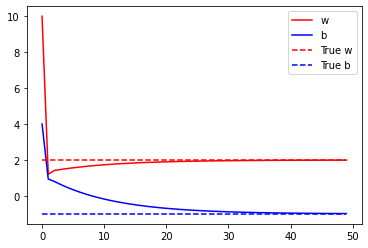

In [49]:
# Plot the w-values and b-values for each training Epoch against the true values
TRUE_w = 2.0
TRUE_b = -1.0
plt.plot(epochs, list_w, 'r', epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()